In [1]:
import pydicom
import os
import sys
import numpy as np
import nibabel as nib
from matplotlib import pyplot, cm
import matplotlib.pyplot as plt
import time
import glob

now=time.localtime(time.time())

In [2]:
def converter(id):
    NiftiPath = "C:/Users/BMPL/Desktop/dicom import/p{}/nifti/".format(id)
    DicomPath = "C:/Users/BMPL/Desktop/dicom import/p{}/dicom/".format(id)

    img = nib.load(NiftiPath+'aseg.nii')
    contour = np.array(img.dataobj)
    contour = np.transpose(contour, (2,1,0))

    print(contour.shape)

    dcm_list = glob.glob(os.path.join(DicomPath, "*.dcm"))
    slices = [pydicom.read_file(dcm) for dcm in dcm_list] # dcm_list에서 받은 .dcm 파일들의 경로를 하나씩 불러들여 pydicom의 read_file함수로 이미지를 읽어들인다.
    slices.sort(key = lambda x: float(x.InstanceNumber)) # 불러들인 slices는 파일 이름 순서로 sort되어 있는데, 파일 이름 순서는 항상 slice 순서를 따르지는 않는다. 따라서 InstanceNumber tag로 sort해준다.
    # RescaleSloope / Intercept tag가 존재하는 경우, 이를 계산하여 array로 stack하고, tag가 존재하지 않으면 계산하지 않고 array로 stack한다.
    if ('RescaleIntercept' in slices[0] and 'RescaleSlope' in slices[0]):
        slope = slices[0].RescaleSlope
        intercept = slices[0].RescaleIntercept
        image = np.stack([s.pixel_array*slope+intercept for s in slices], axis=0)
    else:
        image = np.stack([s.pixel_array for s in slices], axis=0) # axis=0은 slice number가 첫번째 축에 오도록 한다. array_shape = (slice,height,width)

    print(image.shape)
    
    data_path='C:/Users/BMPL/Desktop/data set/'
    np.save(data_path+'MRimages_{}'.format(id), image)
    np.save(data_path+'Mask_{}'.format(id), contour)

In [3]:
##==============전체 데이터셋 개수 입력 창 ==============================##
number_of_p=5
##=======================================================================##
for i in range(number_of_p):
    converter(i+1)

print('converting completed')

(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
(256, 256, 256)
converting completed


NameError: name 'contour' is not defined

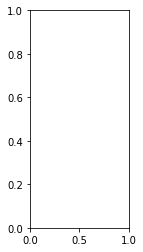

In [4]:
'''from matplotlib import pyplot
plt.subplot(131)
plt.imshow(contour[100].reshape((256, 256)), cmap="gray")
plt.subplot(132)
plt.imshow(image[100].reshape((256, 256)), cmap="gray")

image2=np.reshape(image, (256, 256, 256, 1))
image2=image2/256
contour2=np.reshape(contour, (256, 256, 256, 1))
contour2=contour2*(50/256)
basic=np.zeros((256,256,256,1))

image3=np.concatenate((image2, image2, image2), axis = 3)
contour3=np.concatenate((basic, contour2, basic), axis = 3)


total=image3+contour3
plt.subplot(133)
plt.imshow(total[100])'''